# KNeighborsRegressor and Regression Trees

Exercise on k-nn:
    1. Try the prediction of Boston houses prices with k-nn mean and compare with regression trees.
    2. Tune the k-nn models with k and examples weighting.
    3. Evaluate and plot the results in terms of root mean square error

1. Try the prediction of Boston houses prices with k-nn mean and compare with regression trees.
3. Evaluate and plot the results in terms of root mean square error

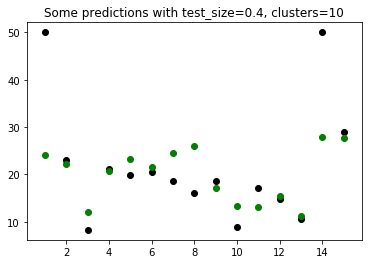

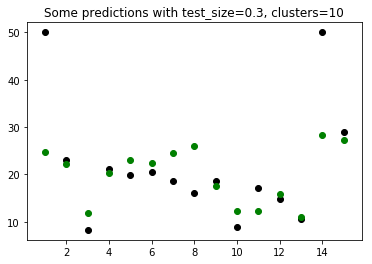

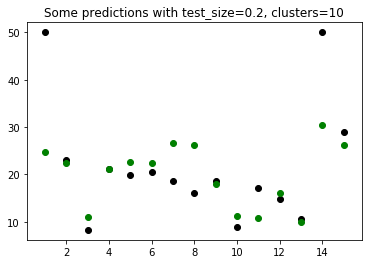

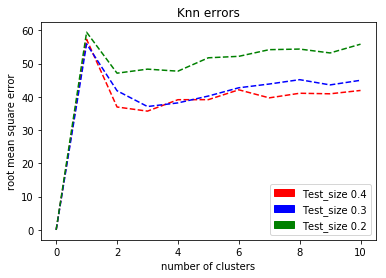

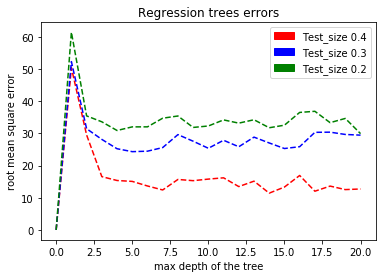

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import neighbors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


#load the dataset of Boston houses prices
dataset = load_boston()


#split the dataset in two part: training set and test set
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.4, random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=0)

X_train3, X_test3, y_train3, y_test3 = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=0)

red_patch = mpatches.Patch(color='red', label='Test_size 0.4')
blue_patch = mpatches.Patch(color='blue', label='Test_size 0.3')
green_patch = mpatches.Patch(color='green', label='Test_size 0.2')


#Knn with uniform weights with different k

n_knn = 11
predicted1 = np.zeros(len(y_test))
knn_err1 = np.zeros(n_knn)
for k in range(1,n_knn):
    clf_knn = neighbors.KNeighborsRegressor(n_neighbors = k, weights='uniform')
    clf_knn.fit(X_train, y_train)
    tot_err = 0
    for i in range(len(y_test)):
        instance = (X_test[i,:]).reshape(1, -1)
        predicted1[i] = clf_knn.predict(instance)[0]
        tot_err = tot_err + (y_test[i]-predicted1[i])**2   
    knn_err1[k] = rmse_err = tot_err/(len(y_test))
    #print("K = "+str(k)+", RMSE = "+str(rmse_err)+".")
    


knn_err2 = np.zeros(n_knn)
predicted2 = np.zeros(len(y_test2))
for k in range(1,n_knn):
    clf_knn = neighbors.KNeighborsRegressor(n_neighbors = k, weights='uniform')
    clf_knn.fit(X_train2, y_train2)
    tot_err = 0
    for i in range(len(y_test2)):
        instance = (X_test2[i,:]).reshape(1, -1)
        predicted2[i] = clf_knn.predict(instance)[0]
        tot_err = tot_err + (y_test2[i]-predicted2[i])**2   
    knn_err2[k] = rmse_err = tot_err/(len(y_test2))
    #print("K = "+str(k)+", RMSE = "+str(rmse_err)+".")
    


knn_err3 = np.zeros(n_knn)
predicted3 = np.zeros(len(y_test3))
for k in range(1,n_knn):
    clf_knn = neighbors.KNeighborsRegressor(n_neighbors = k, weights='uniform')
    clf_knn.fit(X_train3, y_train3)
    tot_err = 0
    for i in range(len(y_test3)):
        instance = (X_test3[i,:]).reshape(1, -1)
        predicted3[i] = clf_knn.predict(instance)[0]
        tot_err = tot_err + (y_test3[i]-predicted3[i])**2   
    knn_err3[k] = rmse_err = tot_err/(len(y_test3))
    #print("K = "+str(k)+", RMSE = "+str(rmse_err)+".")

    
#some predictions with test_size=0.4
plt.scatter(range(1,16), y_test[1:16], c='k',label='data')
plt.scatter(range(1,16), predicted1[1:16], c='g', label='prediction')
plt.title("Some predictions with test_size=0.4, clusters=10")
plt.show()

#some predictions with test_size=0.3
plt.scatter(range(1,16), y_test[1:16], c='k',label='data')
plt.scatter(range(1,16), predicted2[1:16], c='g', label='prediction')
plt.title("Some predictions with test_size=0.3, clusters=10")
plt.show()

#some predictions with test_size=0.2
plt.scatter(range(1,16), y_test[1:16], c='k',label='data')
plt.scatter(range(1,16), predicted3[1:16], c='g', label='prediction')
plt.title("Some predictions with test_size=0.2, clusters=10")
plt.show()


#red: test_size=0.4, blu: test_size=0.3, green: test_size=0.2
plt.plot(range(n_knn),knn_err1,'r--',range(n_knn),knn_err2,'b--',range(n_knn),knn_err3,'g--')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.title("Knn errors")
plt.xlabel('number of clusters')
plt.ylabel('root mean square error')
plt.show()
    
##########################################################################################
    
#Classification with regression tree    

n_tree = 21
tree_err1 = np.zeros(n_tree)
from sklearn.tree import DecisionTreeRegressor
for k in range(1,n_tree):
    regr_tree = DecisionTreeRegressor(max_depth=k)
    regr_tree.fit(X_train, y_train)
    tot_err = 0
    for i in range(len(y_test)):
        instance = (X_test[i,:]).reshape(1, -1)
        predicted = regr_tree.predict(instance)[0]
        tot_err = tot_err + (y_test[i]-predicted)**2 
    tree_err1[k] = rmse_err = tot_err/(len(y_test))
    #print("K = "+str(k)+", RMSE = "+str(rmse_err)+".")
    
    
tree_err2 = np.zeros(n_tree)
from sklearn.tree import DecisionTreeRegressor
for k in range(1,n_tree):
    regr_tree = DecisionTreeRegressor(max_depth=k)
    regr_tree.fit(X_train2, y_train2)
    tot_err = 0
    for i in range(len(y_test2)):
        instance = (X_test2[i,:]).reshape(1, -1)
        predicted = regr_tree.predict(instance)[0]
        tot_err = tot_err + (y_test2[i]-predicted)**2 
    tree_err2[k] = rmse_err = tot_err/(len(y_test2))
    #print("K = "+str(k)+", RMSE = "+str(rmse_err)+".")
    
    
tree_err3 = np.zeros(n_tree)
from sklearn.tree import DecisionTreeRegressor
for k in range(1,n_tree):
    regr_tree = DecisionTreeRegressor(max_depth=k)
    regr_tree.fit(X_train3, y_train3)
    tot_err = 0
    for i in range(len(y_test3)):
        instance = (X_test3[i,:]).reshape(1, -1)
        predicted = regr_tree.predict(instance)[0]
        tot_err = tot_err + (y_test3[i]-predicted)**2 
    tree_err3[k] = rmse_err = tot_err/(len(y_test3))
    #print("K = "+str(k)+", RMSE = "+str(rmse_err)+".")
    
#red: test_size=0.4, blu: test_size=0.3, green: test_size=0.2
plt.plot(range(n_tree),tree_err1,'r--',range(n_tree),tree_err2,'b--',range(n_tree),tree_err3,'g--')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.title("Regression trees errors")
plt.xlabel('max depth of the tree')
plt.ylabel('root mean square error')
plt.show()


2. Tune the k-nn models with k and examples weighting.

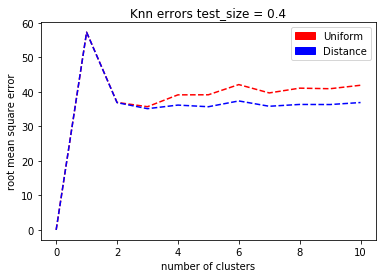

In [35]:
#knn test_size=0.4, weights=uniform
n_knn = 11
predicted1 = np.zeros(len(y_test))
knn_err1 = np.zeros(n_knn)
for k in range(1,n_knn):
    clf_knn = neighbors.KNeighborsRegressor(n_neighbors = k, weights='uniform')
    clf_knn.fit(X_train, y_train)
    tot_err = 0
    for i in range(len(y_test)):
        instance = (X_test[i,:]).reshape(1, -1)
        predicted1[i] = clf_knn.predict(instance)[0]
        tot_err = tot_err + (y_test[i]-predicted1[i])**2   
    knn_err1[k] = rmse_err = tot_err/(len(y_test))
    #print("K = "+str(k)+", RMSE = "+str(rmse_err)+".")

#knn test_size=0.4, weights=distance
n_knn = 11
d_predicted1 = np.zeros(len(y_test))
d_knn_err1 = np.zeros(n_knn)
for k in range(1,n_knn):
    clf_knn = neighbors.KNeighborsRegressor(n_neighbors = k, weights='distance')
    clf_knn.fit(X_train, y_train)
    tot_err = 0
    for i in range(len(y_test)):
        instance = (X_test[i,:]).reshape(1, -1)
        d_predicted1[i] = clf_knn.predict(instance)[0]
        tot_err = tot_err + (y_test[i]-d_predicted1[i])**2   
    d_knn_err1[k] = rmse_err = tot_err/(len(y_test))


#red: uniform, blu: distance
red_patch = mpatches.Patch(color='red', label='Uniform')
blue_patch = mpatches.Patch(color='blue', label='Distance')
plt.legend(handles=[red_patch,blue_patch])
plt.plot(range(n_knn),knn_err1,'r--',range(n_knn),d_knn_err1,'b--')
plt.title("Knn errors test_size = 0.4")
plt.xlabel('number of clusters')
plt.ylabel('root mean square error')
plt.show()